# UN Data and Internet Usage

## 1-6: set up notebook and import all packages and files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6868)

In [3]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

### fixed upload error by halting rows holding footnotes

## 7: Look at the shape of each DataFrame - how many rows? How many columns?

In [4]:
gdp_df.shape

(6868, 4)

In [5]:
internet_df.shape

(4495, 4)

### gdp:[6868 rows x 4 columns], internet:[4495 rows x 4 columns]

## 8: Take a look at the datatypes for the columns in each DataFrame.

In [6]:
list(gdp_df.dtypes)

[dtype('O'), dtype('int64'), dtype('float64'), dtype('float64')]

In [7]:
list(internet_df.dtypes)

[dtype('O'), dtype('int64'), dtype('float64'), dtype('float64')]

## 9: Take a look at the last 10 rows of each DataFrame in turn.

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


## 10: Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [10]:
gdp_df = gdp_df.drop(labels=['Value Footnotes'], axis=1)

In [11]:
internet_df = internet_df.drop(labels=['Value Footnotes'], axis=1)

## 11: Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [12]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

## 12: Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [13]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

## 13: Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [14]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,on=['Country','Year'])
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2014     2102.385234            6.390000
1     Afghanistan  2013     2116.465454            5.900000
2     Afghanistan  2012     2075.491747            5.454545
3     Afghanistan  2011     1904.559799            5.000000
4     Afghanistan  2010     1957.029338            4.000000
...           ...   ...             ...                 ...
3453     Zimbabwe  1997     3580.048793            0.033080
3454     Zimbabwe  1996     3520.430146            0.016790
3455     Zimbabwe  1995     3226.413930            0.007684
3456     Zimbabwe  1994     3263.934978            0.001739
3457     Zimbabwe  1990     3324.348171            0.000000

[3458 rows x 4 columns]


## 14: Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [15]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000


## 15: Look at the last five rows to make sure the data is clean and as expected.

In [16]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3453,Zimbabwe,1997,3580.048793,0.033080
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739
3457,Zimbabwe,1990,3324.348171,0.000000


## 16: Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [17]:
gdp_and_internet_use_sub = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

In [18]:
gdp_and_internet_use_sub

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
5,Afghanistan,2009,1758.904043,3.550000
10,Afghanistan,2004,1200.278256,0.105809
13,Albania,2014,11623.866679,60.100000
18,Albania,2009,10346.864199,41.200000
...,...,...,...,...
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000


## 17: Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [19]:
four = gdp_and_internet_use_sub.loc[gdp_and_internet_use['Year'] == 2004]
print(four)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
10            Afghanistan  2004     1200.278256            0.105809
23                Albania  2004     7604.838002            2.420388
44                Algeria  2004    10058.435939            4.634475
66                 Angola  2004     5593.241537            0.464815
86    Antigua and Barbuda  2004    18745.681534           24.266544
...                   ...   ...             ...                 ...
3361              Uruguay  2004    12479.966871           17.063098
3383           Uzbekistan  2004     3221.189333            2.593725
3404              Vanuatu  2004     2792.356252            4.746603
3424               Zambia  2004     2261.766537            2.013550
3446             Zimbabwe  2004     2480.859342            6.564045

[157 rows x 4 columns]


In [20]:
nine = gdp_and_internet_use_sub.loc[gdp_and_internet_use['Year'] == 2009]
print(nine)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
5             Afghanistan  2009     1758.904043            3.550000
18                Albania  2009    10346.864199           41.200000
39                Algeria  2009    10782.361398           11.230000
61                 Angola  2009     7643.493749            6.000000
81    Antigua and Barbuda  2009    20046.839017           42.000000
...                   ...   ...             ...                 ...
3356              Uruguay  2009    16477.823860           41.800000
3378           Uzbekistan  2009     4446.863606           17.058216
3399              Vanuatu  2009     3270.529800            7.500000
3419               Zambia  2009     2917.516220            6.310000
3441             Zimbabwe  2009     1925.364381           11.360000

[162 rows x 4 columns]


In [21]:
fourteen = gdp_and_internet_use_sub.loc[gdp_and_internet_use['Year'] == 2014]
print(fourteen)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
0             Afghanistan  2014     2102.385234                6.39
13                Albania  2014    11623.866679               60.10
34                Algeria  2014    11512.705405               18.09
56                 Angola  2014     8239.828837               21.26
76    Antigua and Barbuda  2014    18104.241470               64.00
...                   ...   ...             ...                 ...
3351              Uruguay  2014    20582.168953               61.46
3373           Uzbekistan  2014     5764.492705               43.55
3394              Vanuatu  2014     3116.077025               18.80
3414               Zambia  2014     3450.046561               17.34
3436             Zimbabwe  2014     2955.240287               19.89

[163 rows x 4 columns]


## 18: Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [22]:
print(fourteen.sort_values(by = 'Internet_Users_Pct', ascending = False)),
fourteen.max(axis=0)['Internet_Users_Pct']

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
1381      Iceland  2014    49652.149500               98.16
372       Bermuda  2014    77361.104881               96.80
2296       Norway  2014    62589.373548               96.30
854       Denmark  2014    52214.537753               95.99
1798   Luxembourg  2014   108760.916030               94.67
...           ...   ...             ...                 ...
2122      Myanmar  2014     4020.037369                2.10
2256        Niger  2014     1127.615541                1.95
1261       Guinea  2014     2061.760973                1.72
540       Burundi  2014      886.235777                1.38
3087  Timor-Leste  2014     3264.568070                1.14

[163 rows x 4 columns]


98.16

### Iceland with 98.16 pct

## 19: Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [23]:
print(fourteen.sort_values(by = 'Internet_Users_Pct')),
print(fourteen.min(axis=0)['Internet_Users_Pct'])

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
3087   Timor-Leste  2014     3264.568070                1.14
540        Burundi  2014      886.235777                1.38
1261        Guinea  2014     2061.760973                1.72
2256         Niger  2014     1127.615541                1.95
2728  Sierra Leone  2014     1997.511853                2.10
...            ...   ...             ...                 ...
1798    Luxembourg  2014   108760.916030               94.67
854        Denmark  2014    52214.537753               95.99
2296        Norway  2014    62589.373548               96.30
372        Bermuda  2014    77361.104881               96.80
1381       Iceland  2014    49652.149500               98.16

[163 rows x 4 columns]
1.14


### Timor-Leste with 1.14 pct

## 20: Repeat for 2004 and 2009.

In [24]:
print("For 2004"),
print(four.sort_values(by = 'Internet_Users_Pct')),
print('Min usage' + '=' + 'Myanmar'), print(four.min(axis=0)['Internet_Users_Pct']),
print('Max usage' + '=' + 'Sweden'), print(four.max(axis=0)['Internet_Users_Pct'])

For 2004
          Country  Year  GDP_Per_Capita  Internet_Users_Pct
2132      Myanmar  2004     1696.881760            0.024337
1759      Liberia  2004     1181.546158            0.031011
3035   Tajikistan  2004     1737.743630            0.077480
10    Afghanistan  2004     1200.278256            0.105809
1019     Ethiopia  2004      793.093786            0.155335
...           ...   ...             ...                 ...
1063      Finland  2004    43760.279146           72.390000
2306       Norway  2004    60893.410993           77.690000
864       Denmark  2004    50607.628971           80.930000
1391      Iceland  2004    45145.545658           83.880000
2985       Sweden  2004    44496.023401           83.890000

[157 rows x 4 columns]
Min usage=Myanmar
0.024337392002823
Max usage=Sweden
83.89


(None, None)

In [25]:
print("For 2009"),
print(nine.sort_values(by = 'Internet_Users_Pct')),
print('Min usage' + '=' + 'Myanmar'), print(nine.min(axis=0)['Internet_Users_Pct']),
print('Max usage' + '=' + 'Sweden'), print(nine.max(axis=0)['Internet_Users_Pct'])

For 2009
           Country  Year  GDP_Per_Capita  Internet_Users_Pct
3092   Timor-Leste  2009     2724.770973            0.185252
2127       Myanmar  2009     2874.780227            0.220000
2733  Sierra Leone  2009     1372.392285            0.260000
570       Cambodia  2009     2603.583778            0.530000
1014      Ethiopia  2009     1150.206179            0.540000
...            ...   ...             ...                 ...
1803    Luxembourg  2009   104932.811953           87.310000
2190   Netherlands  2009    51772.424928           89.630000
2980        Sweden  2009    45638.035577           91.000000
2301        Norway  2009    61886.564498           92.080000
1386       Iceland  2009    48177.084123           93.000000

[162 rows x 4 columns]
Min usage=Myanmar
0.185251509799805
Max usage=Sweden
93.0


(None, None)

## 21: Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [26]:
print(fourteen.sort_values(by = 'GDP_Per_Capita', ascending = False)),
print('highest'), print(fourteen.max(axis=0)['GDP_Per_Capita'])

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
1798      Luxembourg  2014   108760.916030               94.67
2542           Qatar  2014    95578.416973               91.49
2751       Singapore  2014    87808.663157               82.00
372          Bermuda  2014    77361.104881               96.80
627   Cayman Islands  2014    66207.447230               74.10
...              ...   ...             ...                 ...
3098            Togo  2014     1404.132938                5.70
2102      Mozambique  2014     1217.090210                5.94
2256           Niger  2014     1127.615541                1.95
1842          Malawi  2014     1027.208496                5.83
540          Burundi  2014      886.235777                1.38

[163 rows x 4 columns]
highest
108760.916030081


(None, None)

### Luxembourg with 108760.916030 

## 22: Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [27]:
print(fourteen.sort_values(by = 'GDP_Per_Capita')),
print('Lowest'), print(fourteen.min(axis=0)['GDP_Per_Capita'])

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
540          Burundi  2014      886.235777                1.38
1842          Malawi  2014     1027.208496                5.83
2256           Niger  2014     1127.615541                1.95
2102      Mozambique  2014     1217.090210                5.94
3098            Togo  2014     1404.132938                5.70
...              ...   ...             ...                 ...
627   Cayman Islands  2014    66207.447230               74.10
372          Bermuda  2014    77361.104881               96.80
2751       Singapore  2014    87808.663157               82.00
2542           Qatar  2014    95578.416973               91.49
1798      Luxembourg  2014   108760.916030               94.67

[163 rows x 4 columns]
Lowest
886.23577677556


(None, None)

### Burundi with 886.235777

## 23: Create some scatterplots:

## a. 2004 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP_Per_Capita')

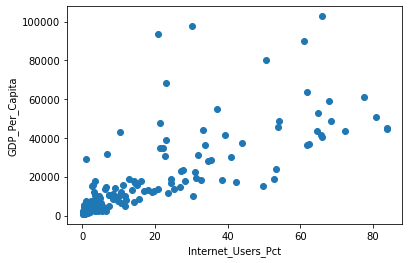

In [28]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = four),
plt.xlabel('Internet_Users_Pct')
plt.ylabel('GDP_Per_Capita')

## b. 2009 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP_Per_Capita')

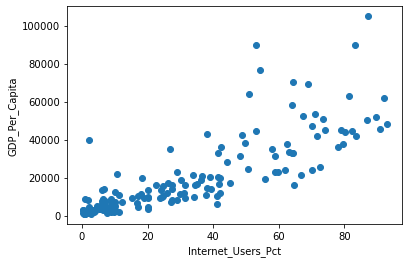

In [29]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = nine),
plt.xlabel('Internet_Users_Pct')
plt.ylabel('GDP_Per_Capita')

## c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP_Per_Capita')

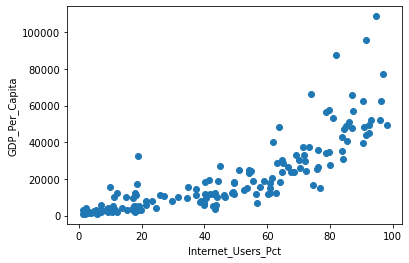

In [30]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = fourteen),
plt.xlabel('Internet_Users_Pct')
plt.ylabel('GDP_Per_Capita')

## 24: Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

### For all 3 years, it seems that an increase in GDP_per_capita is correlated with the increase of Internet_users_pct

## 25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

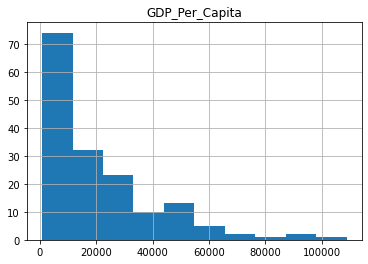

In [31]:
fourteen.hist('GDP_Per_Capita', bins = 10)

### Yes

## 26: Look at the distribution of Internet Use for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

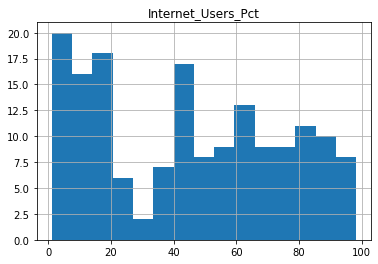

In [32]:
fourteen.hist('Internet_Users_Pct', bins = 15)

### No

## 27: What are the top 5 countries in terms of internet use in 2014?

In [33]:
top5_int_14 = fourteen.sort_values(by = 'Internet_Users_Pct', ascending= False).head()
print(top5_int_14)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
1381     Iceland  2014    49652.149500               98.16
372      Bermuda  2014    77361.104881               96.80
2296      Norway  2014    62589.373548               96.30
854      Denmark  2014    52214.537753               95.99
1798  Luxembourg  2014   108760.916030               94.67


## 28: Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [34]:
top_int_countries = gdp_and_internet_use_sub['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg'])
top_5_internet = gdp_and_internet_use_sub[top_int_countries]
print(top_5_internet)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
372      Bermuda  2014    77361.104881           96.800000
377      Bermuda  2009    89961.982744           83.250000
382      Bermuda  2004    90195.811033           60.990867
854      Denmark  2014    52214.537753           95.990000
859      Denmark  2009    50274.075696           86.840000
864      Denmark  2004    50607.628971           80.930000
1381     Iceland  2014    49652.149500           98.160000
1386     Iceland  2009    48177.084123           93.000000
1391     Iceland  2004    45145.545658           83.880000
1798  Luxembourg  2014   108760.916030           94.670000
1803  Luxembourg  2009   104932.811953           87.310000
1808  Luxembourg  2004   102708.212547           65.880000
2296      Norway  2014    62589.373548           96.300000
2301      Norway  2009    61886.564498           92.080000
2306      Norway  2004    60893.410993           77.690000


In [35]:
top_5_internet.shape

(15, 4)

## 29: Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

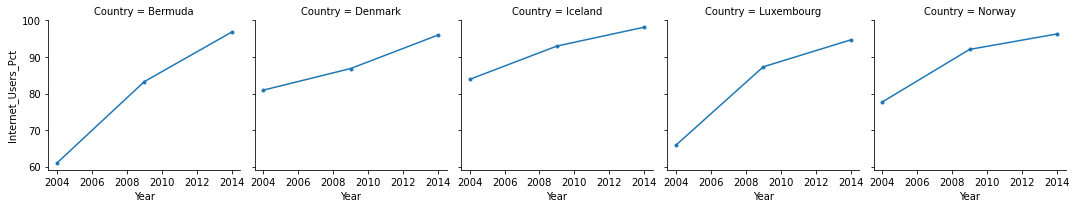

In [36]:
top_5_grid = sns.FacetGrid(top_5_internet, col= "Country")
top_5_grid = top_5_grid.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")

In [37]:
top_5_internet.loc[top_5_internet['Country'] == 'Bermuda']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867


## 30: Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [38]:
bottom5_int_14 = fourteen.sort_values(by = 'Internet_Users_Pct').head()
print(bottom5_int_14)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
3087   Timor-Leste  2014     3264.568070                1.14
540        Burundi  2014      886.235777                1.38
1261        Guinea  2014     2061.760973                1.72
2256         Niger  2014     1127.615541                1.95
2728  Sierra Leone  2014     1997.511853                2.10


In [39]:
bottom_int_countries = gdp_and_internet_use_sub['Country'].isin(['Timor-Leste', 'Burundi', 'Guinea', 'Niger', 'Sierra Leone' ])
bottom_5_internet = gdp_and_internet_use_sub[bottom_int_countries]
print(bottom_5_internet)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
540        Burundi  2014      886.235777            1.380000
545        Burundi  2009      831.564131            0.900000
550        Burundi  2004      817.460585            0.349060
1261        Guinea  2014     2061.760973            1.720000
1266        Guinea  2009     1825.576637            0.940000
1271        Guinea  2004     1778.079082            0.508819
2256         Niger  2014     1127.615541            1.950000
2261         Niger  2009      992.409977            0.760000
2266         Niger  2004      929.883920            0.189934
2728  Sierra Leone  2014     1997.511853            2.100000
2733  Sierra Leone  2009     1372.392285            0.260000
2738  Sierra Leone  2004     1237.630244            0.203008
3087   Timor-Leste  2014     3264.568070            1.140000
3092   Timor-Leste  2009     2724.770973            0.185252


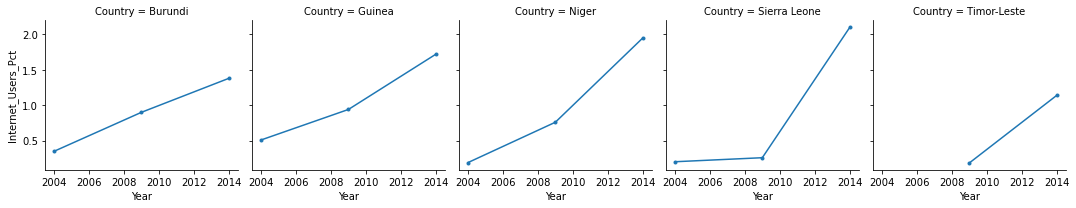

In [40]:
bottom_5_grid = sns.FacetGrid(bottom_5_internet, col= "Country")
bottom_5_grid = bottom_5_grid.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")

In [41]:
bottom_5_internet.loc[bottom_5_internet['Country'] == 'Burundi']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.38000
545,Burundi,2009,831.564131,0.90000
550,Burundi,2004,817.460585,0.34906


## 31: Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [42]:
top5_gdp_14 = fourteen.sort_values(by = 'GDP_Per_Capita', ascending= False).head()
print(top5_gdp_14)

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
1798      Luxembourg  2014   108760.916030               94.67
2542           Qatar  2014    95578.416973               91.49
2751       Singapore  2014    87808.663157               82.00
372          Bermuda  2014    77361.104881               96.80
627   Cayman Islands  2014    66207.447230               74.10


In [43]:
top_gdp_countries = gdp_and_internet_use_sub['Country'].isin(['Luxembourg', 'Qatar', 'Singapore', 'Bermuda', 'Cayman Islands' ])
top_10year = gdp_and_internet_use_sub[top_gdp_countries]
print(top_10year)

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
372          Bermuda  2014    77361.104881           96.800000
377          Bermuda  2009    89961.982744           83.250000
382          Bermuda  2004    90195.811033           60.990867
627   Cayman Islands  2014    66207.447230           74.100000
632   Cayman Islands  2009    70300.334857           64.500000
1798      Luxembourg  2014   108760.916030           94.670000
1803      Luxembourg  2009   104932.811953           87.310000
1808      Luxembourg  2004   102708.212547           65.880000
2542           Qatar  2014    95578.416973           91.490000
2547           Qatar  2009    89954.519993           53.100000
2552           Qatar  2004    93748.301216           20.701648
2751       Singapore  2014    87808.663157           82.000000
2756       Singapore  2009    69466.581746           69.000000
2761       Singapore  2004    63901.716368           62.000000


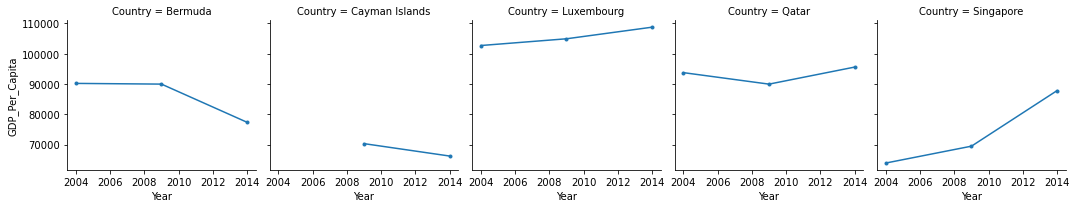

In [44]:
top_10year_grid = sns.FacetGrid(top_10year, col= "Country")
top_10year_grid = top_10year_grid.map(plt.plot, "Year", "GDP_Per_Capita", marker=".")

## 32: Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [45]:
bottom5_gdp_14 = fourteen.sort_values(by = 'GDP_Per_Capita').head()
print(bottom5_gdp_14)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
540      Burundi  2014      886.235777                1.38
1842      Malawi  2014     1027.208496                5.83
2256       Niger  2014     1127.615541                1.95
2102  Mozambique  2014     1217.090210                5.94
3098        Togo  2014     1404.132938                5.70


In [46]:
bottom_gdp_countries = gdp_and_internet_use_sub['Country'].isin(['Burundi', 'Malawi', 'Niger', 'Mozambique', 'Togo'])
bottom_10year = gdp_and_internet_use_sub[bottom_gdp_countries]
print(bottom_10year)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
540      Burundi  2014      886.235777            1.380000
545      Burundi  2009      831.564131            0.900000
550      Burundi  2004      817.460585            0.349060
1842      Malawi  2014     1027.208496            5.830000
1847      Malawi  2009      932.867635            1.070000
1852      Malawi  2004      775.346132            0.347505
2102  Mozambique  2014     1217.090210            5.940000
2107  Mozambique  2009      991.323181            2.680000
2112  Mozambique  2004      792.727155            0.679448
2256       Niger  2014     1127.615541            1.950000
2261       Niger  2009      992.409977            0.760000
2266       Niger  2004      929.883920            0.189934
3098        Togo  2014     1404.132938            5.700000
3103        Togo  2009     1186.114587            2.600000
3108        Togo  2004     1276.676272            1.500000


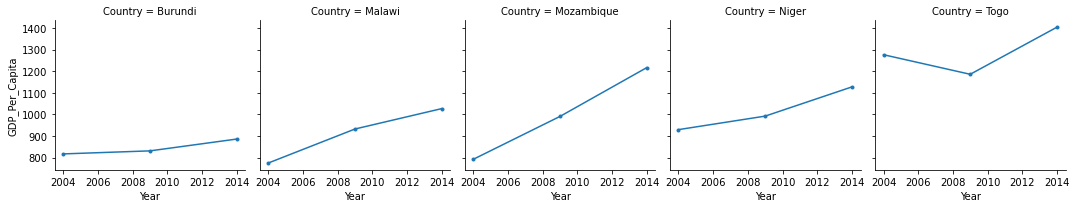

In [47]:
bottom_10year_grid = sns.FacetGrid(bottom_10year, col= "Country")
bottom_10year_grid = bottom_10year_grid.map(plt.plot, "Year", "GDP_Per_Capita", marker=".")

## 33: Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

### 2009 seems to be a point of interest in most visuals with top countries increasing around this point and bottom countries dipping.

### Many interesting events took place in 2009, the global H1N1 pandemic and Barrak Obama's presidential inauguration to name a few.
### For more information and other events, please follow the links below.

* <a href="https://en.wikipedia.org/wiki/2009_swine_flu_pandemic">H1N1 Pandemic</a>

* <a href="https://en.wikipedia.org/wiki/First_inauguration_of_Barack_Obama">President Obama</a>

* <a href="https://facts.net/history/historical-events/2009-facts/#:~:text=23%2028%20Mar%202009%3A%20The,woman%20to%20lead%20the%20UNDP.">2009 events</a>

* <a href="https://www.thepeoplehistory.com/2009.html">More 2009 events</a>

## BONUS: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [48]:
obesity_df = pd.read_csv("../data/adult_obesity.csv", nrows=164)

In [49]:
obesity_df = obesity_df.drop(['Source', 'Unit', 'Value Footnotes'], axis=1)
obesity_df = obesity_df.rename(columns = {'Country or Area': 'Country', 'Subgroup': 'Gender', 'Value': 'Percent_Obese'})
obesity_df = obesity_df.loc[obesity_df['Year'].isin([2004, 2009, 2014])]

In [50]:
obesity_with_gdp_and_int = pd.merge(obesity_df,gdp_and_internet_use_sub,on=['Country','Year'])
obesity_with_gdp_and_int.sort_values('Percent_Obese', ascending= False)

,Country,Gender,Year,Percent_Obese,GDP_Per_Capita,Internet_Users_Pct
15,Seychelles,Female 15+ yr,2004,35,16913.702578,24.272139
6,Greece,Male 15+ yr,2004,26,35018.193259,21.420000
9,Latvia,Female 15+ yr,2004,20,18083.251996,38.580000
5,Greece,Female 15+ yr,2004,18,35018.193259,21.420000
7,Hungary,Female 15+ yr,2004,18,23392.327893,27.740000
8,Hungary,Male 15+ yr,2004,17,23392.327893,27.740000
12,Lithuania,Female 15+ yr,2004,17,19287.898468,31.230000
11,Lesotho,Female 15+ yr,2004,16,1820.079551,2.175524
16,Seychelles,Male 15+ yr,2004,15,16913.702578,24.272139
3,Estonia,Female 15+ yr,2004,15,23763.988944,53.200000


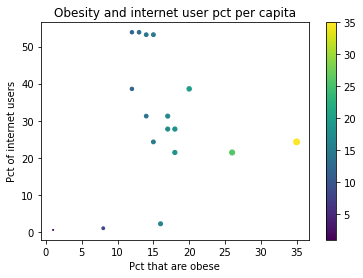

In [51]:
o_i_scatter = plt.scatter(data=obesity_with_gdp_and_int, x='Percent_Obese', y= 'Internet_Users_Pct', c='Percent_Obese', s='Percent_Obese')
plt.title('Obesity and internet user pct per capita')
plt.xlabel('Pct that are obese')
plt.ylabel('Pct of internet users')
plt.colorbar();